In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')
print(df.head())  # Check first 5 rows
print(df.info())  # Check data types and missing values

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Create "TotalBath" feature (FullBath + 0.5 * HalfBath)
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']

# Define features and target
X = df[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
y = df['SalePrice']

In [10]:
print(X.isnull().sum())  # Verify no missing values (should be 0)

GrLivArea       0
BedroomAbvGr    0
TotalBath       0
dtype: int64


In [12]:
print(X.describe())

         GrLivArea  BedroomAbvGr    TotalBath
count  1460.000000   1460.000000  1460.000000
mean   1515.463699      2.866438     1.756507
std     525.480383      0.815778     0.636015
min     334.000000      0.000000     0.000000
25%    1129.500000      2.000000     1.000000
50%    1464.000000      3.000000     2.000000
75%    1776.750000      3.000000     2.500000
max    5642.000000      8.000000     3.500000


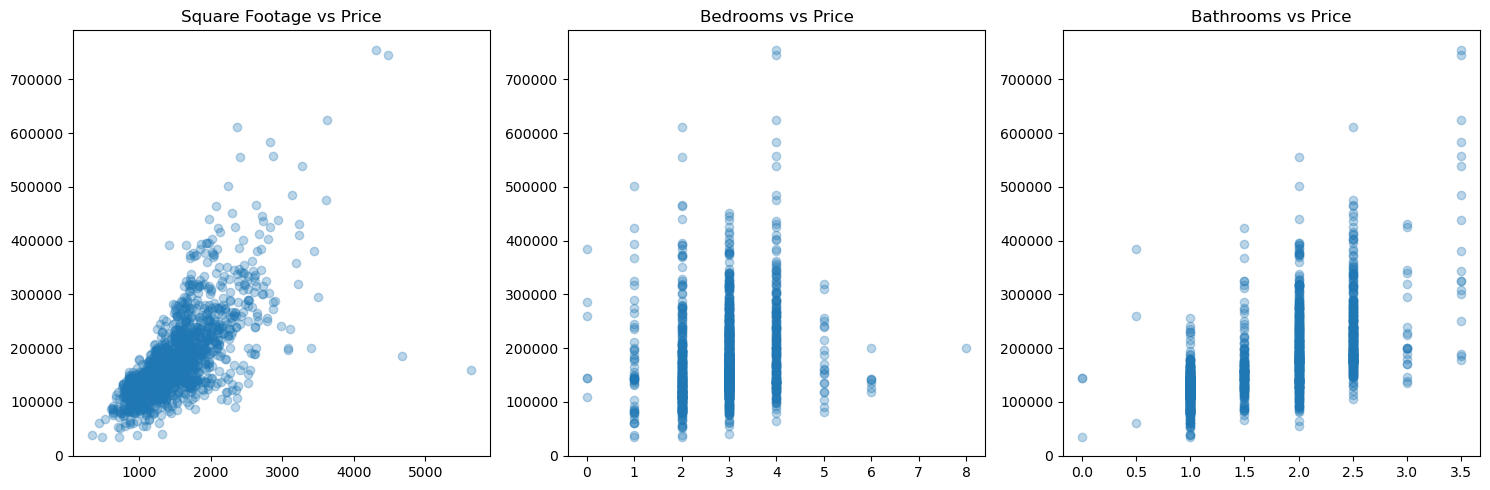

In [14]:
# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X['GrLivArea'], y, alpha=0.3)
plt.title('Square Footage vs Price')

plt.subplot(1, 3, 2)
plt.scatter(X['BedroomAbvGr'], y, alpha=0.3)
plt.title('Bedrooms vs Price')

plt.subplot(1, 3, 3)
plt.scatter(X['TotalBath'], y, alpha=0.3)
plt.title('Bathrooms vs Price')

plt.tight_layout()
plt.show()

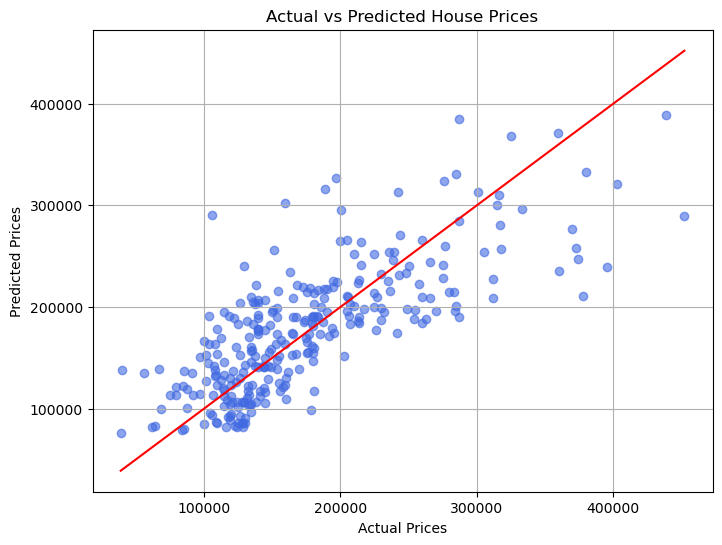

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ideal fit line
plt.grid(True)
plt.show()


In [16]:
# Remove houses with GrLivArea > 4000 sqft (per dataset notes)
X = X[X['GrLivArea'] < 4000]
y = y.loc[X.index]  # Sync target with filtered features

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: ${rmse:,.2f}')  # Error in dollar terms
print(f'R² Score: {r2:.4f}')  # Variance explained

# Inspect coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

RMSE: $48,091.12
R² Score: 0.5593
        Feature   Coefficient
0     GrLivArea    124.848431
1  BedroomAbvGr -30412.767821
2     TotalBath  18858.865249


In [24]:
# Predict on new data (example)
new_house = [[2500, 3, 2.5]]  # [sqft, bedrooms, bathrooms]
#new_house = pd.DataFrame([[2500, 3, 2.5]], columns=X.columns)  to avoid wARNING 
predicted_price = model.predict(new_house)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')

Predicted Price: $314,607.65


C:\Users\AKSHAY KUMAR\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
new_house = pd.DataFrame(
    [[2500, 3, 2.5]], 
    columns=['GrLivArea', 'BedroomAbvGr', 'TotalBath']  # Explicit feature names
)
predicted_price = model.predict(new_house)
print(f'Predicted Price: ${predicted_price[0]:,.2f}')

Predicted Price: $314,607.65
